In [1]:
!git clone https://github.com/AnshuLodha007/Unicorn_Hackathon.git

fatal: destination path 'Unicorn_Hackathon' already exists and is not an empty directory.


# Importing the Data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from pandas import Series
%matplotlib inline

from sklearn.metrics import mean_squared_error
from math import sqrt
from statistics import mean

import warnings
warnings.filterwarnings("ignore")

In [3]:
# Reading the csv files

#train = pd.read_csv('/Unicorn_Hackathon/Train.csv')
#test = pd.read_csv('/Unicorn_Hackathon/Test.csv')

train = pd.read_csv(rf'C:\Dropbox\GenAI\Analytics_Vidhya\Time_Series_Forecasting_using_Python\Train.csv')
test = pd.read_csv(rf'C:\Dropbox\GenAI\Analytics_Vidhya\Time_Series_Forecasting_using_Python\Test.csv')
train.shape, test.shape

((18288, 3), (5112, 2))

In [4]:
# making copy of orignal data.

train_orignal = train.copy()
test_orignal = test.copy()

In [5]:
train.columns

Index(['ID', 'Datetime', 'Count'], dtype='object')

In [6]:
train.dtypes

ID           int64
Datetime    object
Count        int64
dtype: object

# Feature Extraction

In [7]:
train['Datetime'] = pd.to_datetime(train.Datetime, format = '%d-%m-%Y %H:%M')
test['Datetime'] = pd.to_datetime(test.Datetime, format = '%d-%m-%Y %H:%M')

In [8]:
train_orignal['Datetime'] = pd.to_datetime(train.Datetime, format = '%d-%m-%Y %H:%M')
test_orignal['Datetime'] = pd.to_datetime(test.Datetime, format = '%d-%m-%Y %H:%M')

In [9]:
# Extracting Year, Mont, Date, Day, Hour for each table.

for i in (train, test, train_orignal, test_orignal):
  i['year'] = i.Datetime.dt.year
  i['month'] = i.Datetime.dt.month
  i['day'] = i.Datetime.dt.day
  i['Hour'] = i.Datetime.dt.hour

In [10]:
train.head()

,ID,Datetime,Count,year,month,day,Hour
0,0,2012-08-25 00:00:00,8,2012,8,25,0
1,1,2012-08-25 01:00:00,2,2012,8,25,1
2,2,2012-08-25 02:00:00,6,2012,8,25,2
3,3,2012-08-25 03:00:00,2,2012,8,25,3
4,4,2012-08-25 04:00:00,2,2012,8,25,4


In [11]:
# Extracting 'Day of Week' and 'Is Weekend' for train data, as we are looking forward to see variation wrt weekdays.

train['day of week'] = train['Datetime'].dt.dayofweek
train['weekend'] = train['day of week'].apply(lambda x: 1 if x in [5, 6] else 0)

In [12]:
train.head()

,ID,Datetime,Count,year,month,day,Hour,day of week,weekend
0,0,2012-08-25 00:00:00,8,2012,8,25,0,5,1
1,1,2012-08-25 01:00:00,2,2012,8,25,1,5,1
2,2,2012-08-25 02:00:00,6,2012,8,25,2,5,1
3,3,2012-08-25 03:00:00,2,2012,8,25,3,5,1
4,4,2012-08-25 04:00:00,2,2012,8,25,4,5,1


## Since its a time series based prediction, we try and check our various hypothesis now

### Passenger count wrt date - generic plot

In [13]:
df = train.drop('ID', 1)
df.head()

,Datetime,Count,year,month,day,Hour,day of week,weekend
0,2012-08-25 00:00:00,8,2012,8,25,0,5,1
1,2012-08-25 01:00:00,2,2012,8,25,1,5,1
2,2012-08-25 02:00:00,6,2012,8,25,2,5,1
3,2012-08-25 03:00:00,2,2012,8,25,3,5,1
4,2012-08-25 04:00:00,2,2012,8,25,4,5,1


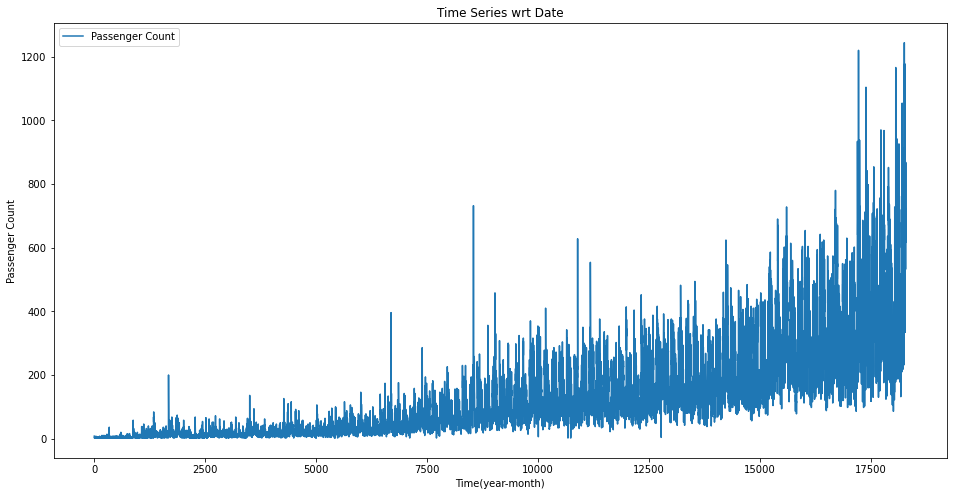

In [14]:
plt.figure(figsize = (16,8))
plt.plot(df['Count'], label = 'Passenger Count')
plt.title('Time Series wrt Date')
plt.xlabel('Time(year-month)')
plt.ylabel('Passenger Count')
plt.legend(loc = 'best')

### Hypothesis 1: Inc with years

<AxesSubplot:xlabel='year'>

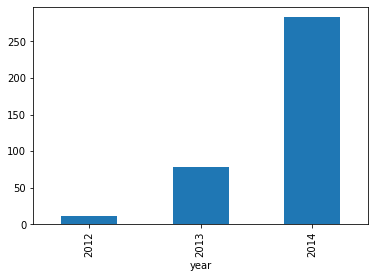

In [15]:
train.groupby('year')['Count'].mean().plot.bar()

Exponential Growth Observed

### Hypothesis 2: Traffic Inc in May to Oct.



<AxesSubplot:xlabel='month'>

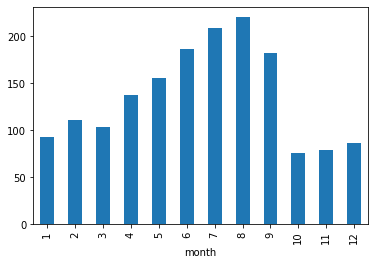

In [16]:
train.groupby('month')['Count'].mean().plot.bar()

InAccurate Hypothesis: Getting more in depth analysis

<AxesSubplot:title={'center':'Passenger Count(Monthwise)'}, xlabel='year,month'>

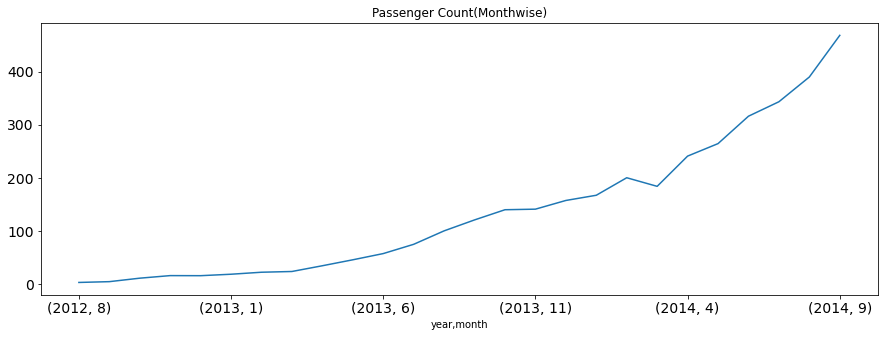

In [17]:
tmp = train.groupby(['year', 'month'])['Count'].mean()
tmp.plot(figsize = (15,5), title = 'Passenger Count(Monthwise)', fontsize = 14)

<AxesSubplot:xlabel='year,month'>

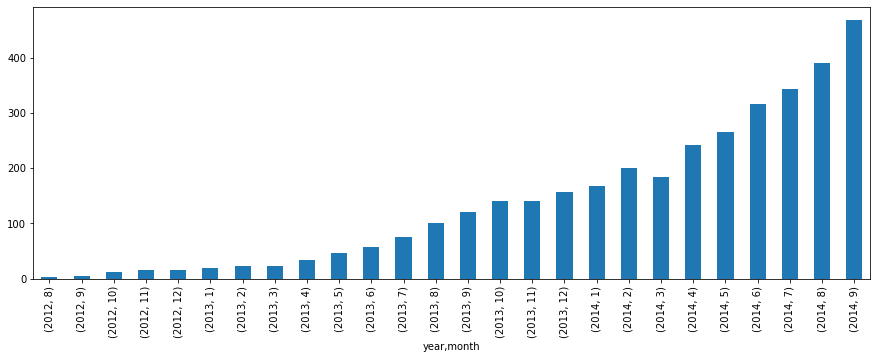

In [18]:
train.groupby(['year', 'month'])['Count'].mean().plot.bar(figsize = (15,5))

Passengers are increaing exponentiall wrt months as well as years

### Hypothesis 3: Trend of traffic due day of week

<AxesSubplot:title={'center':'Date based passenger trends'}, xlabel='day'>

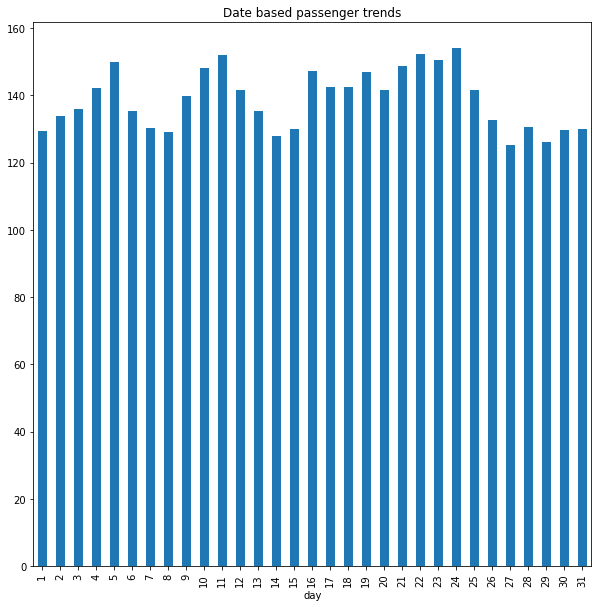

In [19]:
train.groupby('day')['Count'].mean().plot.bar(figsize = (10,10), title = 'Date based passenger trends')

Not much insightful

### Hypothesis 4: Hourly Traffic Analysis

<AxesSubplot:title={'center':'Hourly passenger trends'}, xlabel='Hour'>

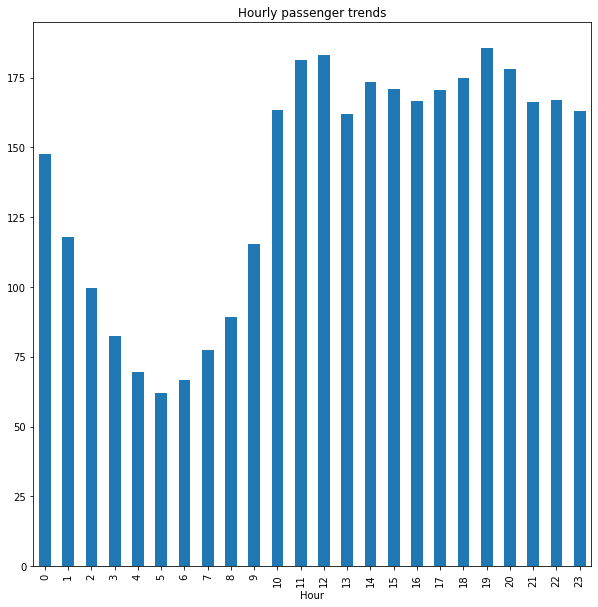

In [20]:
train.groupby('Hour')['Count'].mean().plot.bar(figsize = (10,10), title = 'Hourly passenger trends')

We can see passengers are less during the early hours of the day.


There are peaks at 10 AM and 7 PM relating to the office hours.

### Hypothesis 5: Weekday > Weekend

<AxesSubplot:title={'center':'Weekend passenger trends'}, xlabel='weekend'>

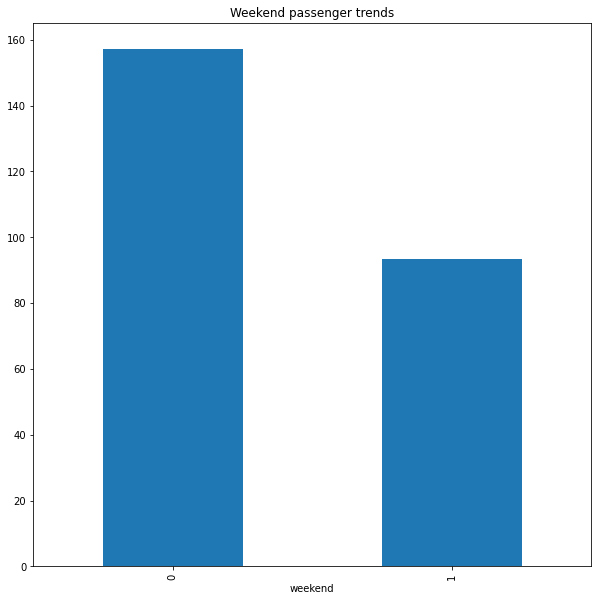

In [21]:
train.groupby('weekend')['Count'].mean().plot.bar(figsize = (10,10), title = 'Weekend passenger trends')

Hypothesis stands Corrected

<AxesSubplot:title={'center':'Hourly passenger trends'}, xlabel='weekend'>

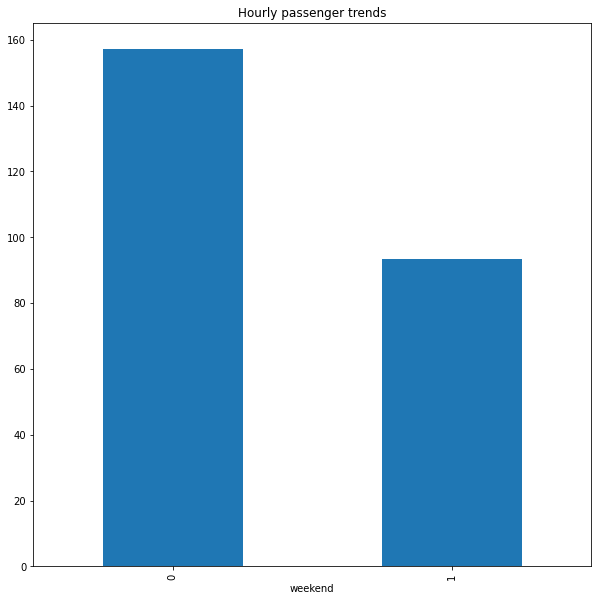

In [22]:
train.groupby('weekend')['Count'].mean().plot.bar(figsize = (10,10), title = 'Hourly passenger trends')

### Hypothesis 6: Day of week wise traffic.

<AxesSubplot:title={'center':'Weekday passenger trends'}, xlabel='day of week'>

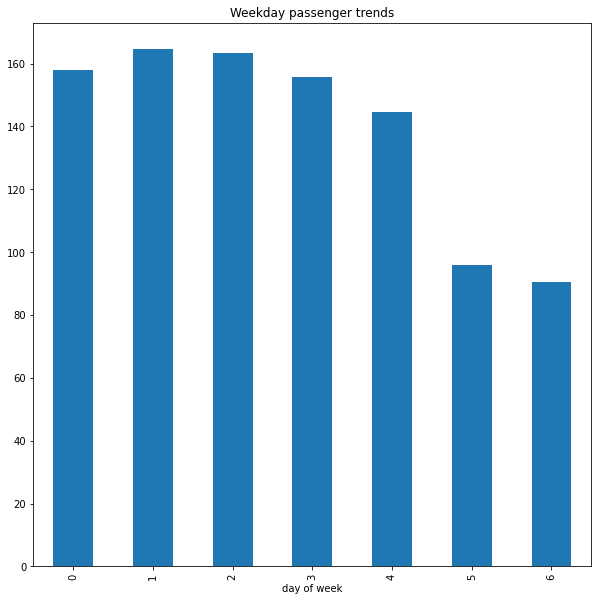

In [23]:
train.groupby('day of week')['Count'].mean().plot.bar(figsize = (10,10), title = 'Weekday passenger trends')

Weekends see lesser traffic

### Counclusion

1. Exponential incerease with years.
2. More traffic during weekdays then weekend.
3. More traffic in 10 AM to 7 PM bracket of the day.

# Data Modelling or EDA

In [24]:
train = train.drop('ID', 1)

In [25]:
train.Timestamp  = pd.to_datetime(train.Datetime, format = '%d-%m-%Y %H:%M')
train.head()

,Datetime,Count,year,month,day,Hour,day of week,weekend
0,2012-08-25 00:00:00,8,2012,8,25,0,5,1
1,2012-08-25 01:00:00,2,2012,8,25,1,5,1
2,2012-08-25 02:00:00,6,2012,8,25,2,5,1
3,2012-08-25 03:00:00,2,2012,8,25,3,5,1
4,2012-08-25 04:00:00,2,2012,8,25,4,5,1


In [26]:
train.index = train.Timestamp

In [27]:
train.head()

,Datetime,Count,year,month,day,Hour,day of week,weekend
Datetime,,,,,,,,
2012-08-25 00:00:00,2012-08-25 00:00:00,8,2012,8,25,0,5,1
2012-08-25 01:00:00,2012-08-25 01:00:00,2,2012,8,25,1,5,1
2012-08-25 02:00:00,2012-08-25 02:00:00,6,2012,8,25,2,5,1
2012-08-25 03:00:00,2012-08-25 03:00:00,2,2012,8,25,3,5,1
2012-08-25 04:00:00,2012-08-25 04:00:00,2,2012,8,25,4,5,1


Data is provided on hourly basis, but lets make it uniform just to be sure.

In [28]:
# Making Hourly time Series.
hourly = train.resample('H').mean()
hourly.shape

(18288, 7)

In [29]:
# Making daily time Series. - This will resample all the data on day level, i.e hours will become avg.
daily = train.resample('D').mean()
daily.shape

(762, 7)

In [30]:
# Making Weekly time Series.
weekly = train.resample('W').mean()
weekly.shape

(110, 7)

In [31]:
# Making Monthly time Series.
monthly = train.resample('M').mean()
monthly.shape

(26, 7)

<AxesSubplot:title={'center':'Monthly'}, xlabel='Datetime'>

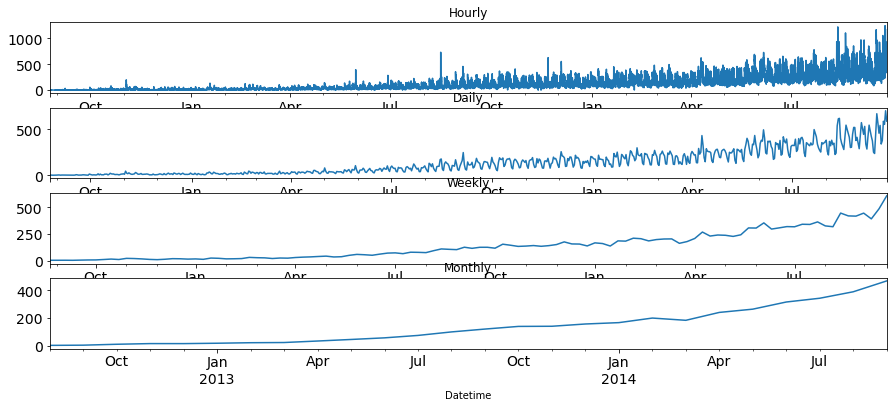

In [32]:
# Plotting Hourly, daily, weekly, monthly plots

fig, axs = plt.subplots(4,1)
hourly.Count.plot(figsize= (15,6), title = 'Hourly', fontsize = 14, ax= axs[0])
daily.Count.plot(figsize= (15,6), title = 'Daily', fontsize = 14, ax= axs[1])
weekly.Count.plot(figsize= (15,6), title = 'Weekly', fontsize = 14, ax= axs[2])
monthly.Count.plot(figsize= (15,6), title = 'Monthly', fontsize = 14, ax= axs[3])

It will become hectic to convert monthly predictions to hourly, so we will work with day level aggragated series

In [33]:
test_orignal.head()

,ID,Datetime,year,month,day,Hour
0,18288,2014-09-26 00:00:00,2014,9,26,0
1,18289,2014-09-26 01:00:00,2014,9,26,1
2,18290,2014-09-26 02:00:00,2014,9,26,2
3,18291,2014-09-26 03:00:00,2014,9,26,3
4,18292,2014-09-26 04:00:00,2014,9,26,4


In [34]:
test.Timestamp = pd.to_datetime(test.Datetime, format = "%d-%m-%Y %H:%M")
test.index = test.Timestamp

In [35]:
# Converting test data to day level
test = test.resample('D').mean()
test.head()

,ID,year,month,day,Hour
Datetime,,,,,
2014-09-26,18299.5,2014.0,9.0,26.0,11.5
2014-09-27,18323.5,2014.0,9.0,27.0,11.5
2014-09-28,18347.5,2014.0,9.0,28.0,11.5
2014-09-29,18371.5,2014.0,9.0,29.0,11.5
2014-09-30,18395.5,2014.0,9.0,30.0,11.5


In [36]:
train = daily.copy()
train.head()

,Count,year,month,day,Hour,day of week,weekend
Datetime,,,,,,,
2012-08-25,3.166667,2012.0,8.0,25.0,11.5,5.0,1.0
2012-08-26,3.666667,2012.0,8.0,26.0,11.5,6.0,1.0
2012-08-27,2.583333,2012.0,8.0,27.0,11.5,0.0,0.0
2012-08-28,2.416667,2012.0,8.0,28.0,11.5,1.0,0.0
2012-08-29,2.500000,2012.0,8.0,29.0,11.5,2.0,0.0


# Building Model

## Building Loss Functions

In [76]:
# RMSE

from sklearn.metrics import mean_squared_error
from math import sqrt

def RMSE(Actual, Predicted):
  rms = sqrt(mean_squared_error(Actual, Predicted))
  return rms

## Train-Val Split

In [43]:
train.groupby(['year', 'month']).year.value_counts()

year    month  year  
2012.0  8.0    2012.0     7
        9.0    2012.0    30
        10.0   2012.0    31
        11.0   2012.0    30
        12.0   2012.0    31
2013.0  1.0    2013.0    31
        2.0    2013.0    28
        3.0    2013.0    31
        4.0    2013.0    30
        5.0    2013.0    31
        6.0    2013.0    30
        7.0    2013.0    31
        8.0    2013.0    31
        9.0    2013.0    30
        10.0   2013.0    31
        11.0   2013.0    30
        12.0   2013.0    31
2014.0  1.0    2014.0    31
        2.0    2014.0    28
        3.0    2014.0    31
        4.0    2014.0    30
        5.0    2014.0    31
        6.0    2014.0    30
        7.0    2014.0    31
        8.0    2014.0    31
        9.0    2014.0    25
Name: year, dtype: int64

In [45]:
# Data is fpr 26 months, taking last 3 months of data as vel set.

train.head()

,Count,year,month,day,Hour,day of week,weekend
Datetime,,,,,,,
2012-08-25,3.166667,2012.0,8.0,25.0,11.5,5.0,1.0
2012-08-26,3.666667,2012.0,8.0,26.0,11.5,6.0,1.0
2012-08-27,2.583333,2012.0,8.0,27.0,11.5,0.0,0.0
2012-08-28,2.416667,2012.0,8.0,28.0,11.5,1.0,0.0
2012-08-29,2.500000,2012.0,8.0,29.0,11.5,2.0,0.0


In [47]:
train.tail()

,Count,year,month,day,Hour,day of week,weekend
Datetime,,,,,,,
2014-09-21,379.250000,2014.0,9.0,21.0,11.5,6.0,1.0
2014-09-22,588.166667,2014.0,9.0,22.0,11.5,0.0,0.0
2014-09-23,554.333333,2014.0,9.0,23.0,11.5,1.0,0.0
2014-09-24,702.333333,2014.0,9.0,24.0,11.5,2.0,0.0
2014-09-25,589.666667,2014.0,9.0,25.0,11.5,3.0,0.0


In [57]:
Train = train.loc['2012-08-25': '2014-06-24']
val = train.loc['2014-06-25': '2014-09-25']

Train.shape, val.shape

((669, 7), (93, 7))

In [58]:
Train.head()

,Count,year,month,day,Hour,day of week,weekend
Datetime,,,,,,,
2012-08-25,3.166667,2012.0,8.0,25.0,11.5,5.0,1.0
2012-08-26,3.666667,2012.0,8.0,26.0,11.5,6.0,1.0
2012-08-27,2.583333,2012.0,8.0,27.0,11.5,0.0,0.0
2012-08-28,2.416667,2012.0,8.0,28.0,11.5,1.0,0.0
2012-08-29,2.500000,2012.0,8.0,29.0,11.5,2.0,0.0


In [59]:
val.head()

,Count,year,month,day,Hour,day of week,weekend
Datetime,,,,,,,
2014-06-25,353.666667,2014.0,6.0,25.0,11.5,2.0,0.0
2014-06-26,395.250000,2014.0,6.0,26.0,11.5,3.0,0.0
2014-06-27,282.333333,2014.0,6.0,27.0,11.5,4.0,0.0
2014-06-28,218.250000,2014.0,6.0,28.0,11.5,5.0,1.0
2014-06-29,196.250000,2014.0,6.0,29.0,11.5,6.0,1.0


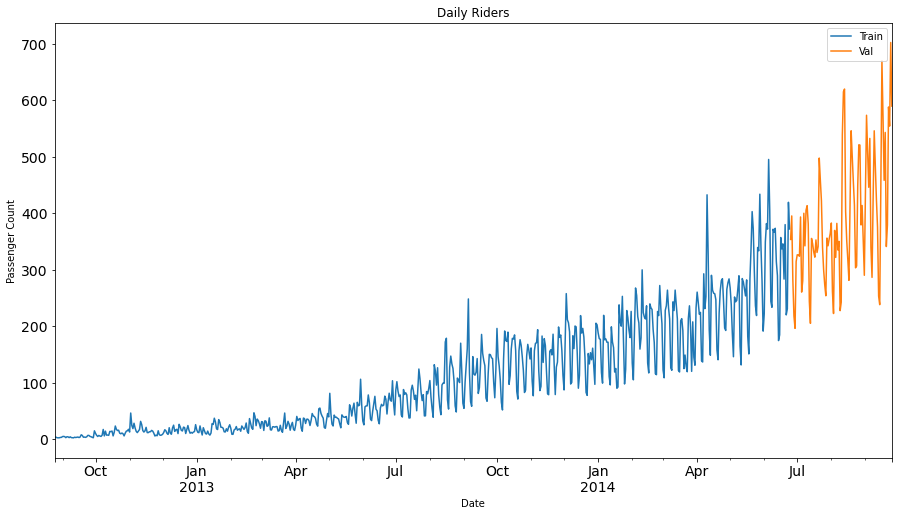

In [60]:
# plotting the train-val split

Train.Count.plot(figsize = (15,8), title = 'Daily Riders', fontsize = 14, label = 'Train')
val.Count.plot(figsize = (15,8), title = 'Daily Riders', fontsize = 14, label = 'Val')

plt.ylabel('Passenger Count')
plt.xlabel('Date')
plt.legend(loc = 'best')
plt.show()

## Model 1: Naive Approach

In [65]:
dd = np.asarray(Train.Count) # Making the array
y_hat = val.copy()    #Copying the val into y_hat for naive prediction
y_hat['naive'] = dd[len(dd) - 1] # Assigning the last value of train to y_hat
y_hat.head()

,Count,year,month,day,Hour,day of week,weekend,naive
Datetime,,,,,,,,
2014-06-25,353.666667,2014.0,6.0,25.0,11.5,2.0,0.0,372.166667
2014-06-26,395.250000,2014.0,6.0,26.0,11.5,3.0,0.0,372.166667
2014-06-27,282.333333,2014.0,6.0,27.0,11.5,4.0,0.0,372.166667
2014-06-28,218.250000,2014.0,6.0,28.0,11.5,5.0,1.0,372.166667
2014-06-29,196.250000,2014.0,6.0,29.0,11.5,6.0,1.0,372.166667


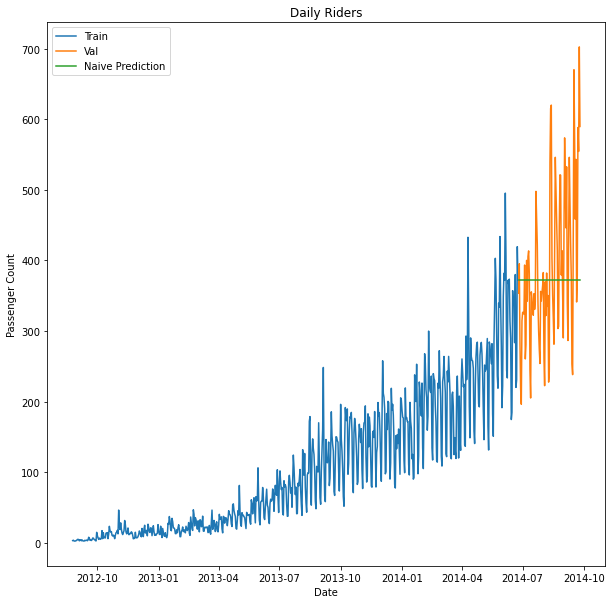

In [75]:
# Printing the Train, val, y_hat

plt.figure(figsize=(10, 10))
plt.plot(Train.index, Train.Count, label = 'Train')
plt.plot(val.index, val.Count, label = 'Val')
plt.plot(y_hat.index, y_hat.naive, label = 'Naive Prediction')


plt.ylabel('Passenger Count')
plt.xlabel('Date')
plt.legend(loc = 'best')
plt.title('Daily Riders')
plt.show()

In [87]:
print(f'RMSE for Naive method: {RMSE(np.asarray(val.Count), np.asarray(y_hat.naive))}')

RMSE for Naive method: 111.79050467496724


## Model 2: Moving Average

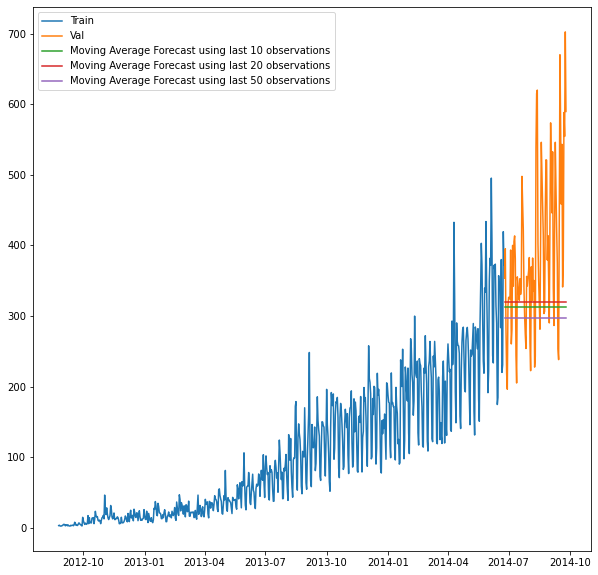

In [93]:
y_hat_avg = val.copy()
y_hat_avg['moving_avg_forecast_10'] = Train['Count'].rolling(10).mean().iloc[-1] # Average of last 10 values
y_hat_avg['moving_avg_forecast_20'] = Train['Count'].rolling(20).mean().iloc[-1] # Average of last 20 values
y_hat_avg['moving_avg_forecast_50'] = Train['Count'].rolling(50).mean().iloc[-1] # Average of last 50 values

plt.figure(figsize = (10, 10))
plt.plot(Train['Count'], label = 'Train')
plt.plot(val['Count'], label = 'Val')
plt.plot(y_hat_avg['moving_avg_forecast_10'], label = 'Moving Average Forecast using last 10 observations')
plt.plot(y_hat_avg['moving_avg_forecast_20'], label = 'Moving Average Forecast using last 20 observations')
plt.plot(y_hat_avg['moving_avg_forecast_50'], label = 'Moving Average Forecast using last 50 observations')
plt.legend(loc = 'best')
plt.show()



In [95]:
print(f'RMSE for Moving Average with 10 observations method: {RMSE(np.asarray(val.Count), np.asarray(y_hat_avg.moving_avg_forecast_10))}')
print(f'RMSE for Moving Average with 20 observations method: {RMSE(np.asarray(val.Count), np.asarray(y_hat_avg.moving_avg_forecast_20))}')
print(f'RMSE for Moving Average with 50 observations method: {RMSE(np.asarray(val.Count), np.asarray(y_hat_avg.moving_avg_forecast_50))}')

RMSE for Moving Average with 10 observations method: 134.23733308950264
RMSE for Moving Average with 20 observations method: 130.4498497755042
RMSE for Moving Average with 50 observations method: 144.19175679986793


## Model 3: Simple Exponential Smoothing

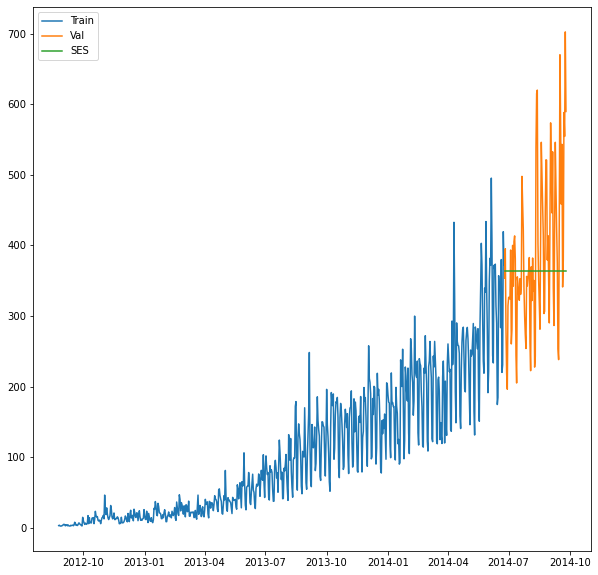

In [110]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing

y_hat_avg = val.copy()
fit2 = SimpleExpSmoothing(np.asarray(Train['Count'])).fit(smoothing_level= 0.6, optimized= False)
y_hat_avg['SES'] = fit2.forecast(len(valid))

plt.figure(figsize = (10, 10))
plt.plot(Train['Count'], label = 'Train')
plt.plot(val['Count'], label = 'Val')
plt.plot(y_hat_avg['SES'], label = 'SES')
plt.legend(loc = 'best')
plt.show()

In [111]:
print(f'RMSE for Simple Exponential Smoothing: {RMSE(np.asarray(val.Count), np.asarray(y_hat_avg.SES))}')


RMSE for Simple Exponential Smoothing: 113.43708111884514


## Model 4: Holt's Linear Trend Model

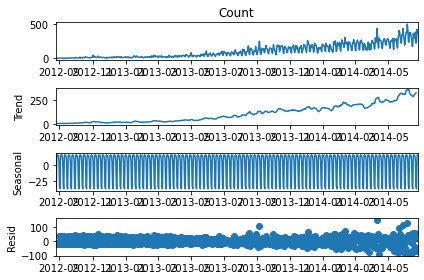

In [112]:
# Checking out the components of our time series

from statsmodels.tsa.api import Holt
import statsmodels.api as sm

sm.tsa.seasonal_decompose(Train.Count).plot()

result = sm.tsa.stattools.adfuller(train.Count)
plt.show()

- Increasing trend can be seen
- Seasonality can be seen
- Residuals are obsered

Series is **NOT STATIONARY**

In [113]:
# Makin Holt's Linear Trend Model Prediction

y_hat_avg = val.copy()
fit1 = Holt(np.asarray(Train['Count'])).fit(smoothing_level= 0.3, smoothing_slope = 0.1)
y_hat_avg['Holt_Linear'] = fit1.forecast(len(valid))

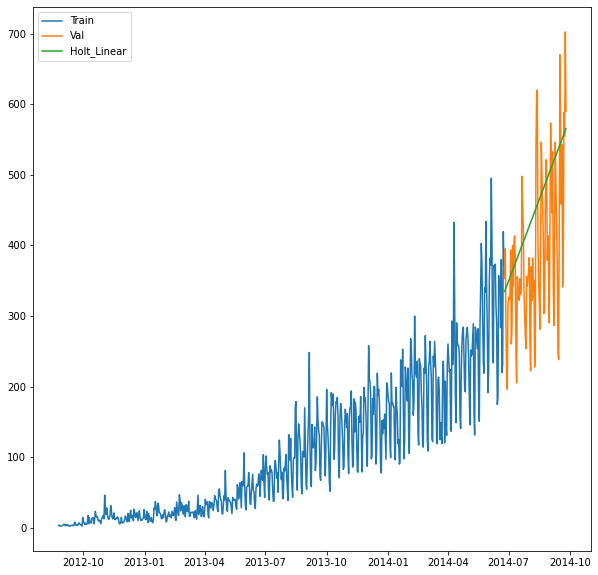

In [114]:
plt.figure(figsize = (10, 10))
plt.plot(Train['Count'], label = 'Train')
plt.plot(val['Count'], label = 'Val')
plt.plot(y_hat_avg['Holt_Linear'], label = 'Holt_Linear')
plt.legend(loc = 'best')
plt.show()

In [115]:
print(f"RMSE for Holt's Linear Trend: {RMSE(np.asarray(val.Count), np.asarray(y_hat_avg.Holt_Linear))}")


RMSE for Holt's Linear Trend: 112.94278345314041


# Predicting the values

## Using Holt's Linear Model

In [116]:
#submission = pd.read_csv('/Unicorn_Hackathon/Test.csv')
submission = pd.read_csv(rf'C:\Dropbox\GenAI\Analytics_Vidhya\Time_Series_Forecasting_using_Python\Test.csv')

In [117]:
submission.head()

,ID,Datetime
0,18288,26-09-2014 00:00
1,18289,26-09-2014 01:00
2,18290,26-09-2014 02:00
3,18291,26-09-2014 03:00
4,18292,26-09-2014 04:00


In [118]:
predict = fit1.forecast(len(test))
test['prediction'] = predict

In [119]:
test.head()

,ID,year,month,day,Hour,prediction
Datetime,,,,,,
2014-09-26,18299.5,2014.0,9.0,26.0,11.5,334.650767
2014-09-27,18323.5,2014.0,9.0,27.0,11.5,337.159011
2014-09-28,18347.5,2014.0,9.0,28.0,11.5,339.667256
2014-09-29,18371.5,2014.0,9.0,29.0,11.5,342.175500
2014-09-30,18395.5,2014.0,9.0,30.0,11.5,344.683745


In [133]:
# Calculating the proportion of passengers per hour and then distributing the daily predicted  output to hourly predictions.

# Calculating the hourly ratio.
train_orignal['ratio'] = train_orignal['Count']/train_orignal['Count'].sum()

# Grouping the hourly ratio
temp = train_orignal.groupby(['Hour'])['ratio'].sum()

# Sending the grouping to csv file
pd.DataFrame(temp, columns = ['Hour', 'ratio']).to_csv(fr'C:\Dropbox\GenAI\Analytics_Vidhya\Time_Series_Forecasting_using_Python\Groupby.csv')

In [178]:
temp.head()

Hour
0    0.044287
1    0.035343
2    0.029911
3    0.024714
4    0.020802
Name: ratio, dtype: float64

In [134]:
temp2 = pd.read_csv(fr'C:\Dropbox\GenAI\Analytics_Vidhya\Time_Series_Forecasting_using_Python\Groupby.csv')
temp2.head()

,Hour,Hour.1,ratio
0,0,NaN,0.044287
1,1,NaN,0.035343
2,2,NaN,0.029911
3,3,NaN,0.024714
4,4,NaN,0.020802


In [135]:
temp2 = temp2.drop('Hour.1', 1)
temp2.head()

,Hour,ratio
0,0,0.044287
1,1,0.035343
2,2,0.029911
3,3,0.024714
4,4,0.020802


In [137]:
# Merge the Test and test_orignal

merge = pd.merge(test, test_orignal, on = ('day', 'month', 'year'), how = 'left')
merge.head()

,ID_x,year,month,day,Hour_x,prediction,ID_y,Datetime,Hour_y
0,18299.5,2014.0,9.0,26.0,11.5,334.650767,18288,2014-09-26 00:00:00,0
1,18299.5,2014.0,9.0,26.0,11.5,334.650767,18289,2014-09-26 01:00:00,1
2,18299.5,2014.0,9.0,26.0,11.5,334.650767,18290,2014-09-26 02:00:00,2
3,18299.5,2014.0,9.0,26.0,11.5,334.650767,18291,2014-09-26 03:00:00,3
4,18299.5,2014.0,9.0,26.0,11.5,334.650767,18292,2014-09-26 04:00:00,4


In [139]:
merge['Hour'] = merge['Hour_y']

In [140]:
merge = merge.drop(['year', 'month', 'Datetime', 'Hour_x', 'Hour_y'], axis = 1)

In [141]:
merge.head()

,ID_x,day,prediction,ID_y,Hour
0,18299.5,26.0,334.650767,18288,0
1,18299.5,26.0,334.650767,18289,1
2,18299.5,26.0,334.650767,18290,2
3,18299.5,26.0,334.650767,18291,3
4,18299.5,26.0,334.650767,18292,4


In [154]:
# Predicting by merging merge and temp2

prediction = pd.merge(merge, temp2, on = ['Hour'], how= 'left')
prediction.head()

,ID_x,day,prediction,ID_y,Hour,ratio
0,18299.5,26.0,334.650767,18288,0,0.044287
1,18299.5,26.0,334.650767,18289,1,0.035343
2,18299.5,26.0,334.650767,18290,2,0.029911
3,18299.5,26.0,334.650767,18291,3,0.024714
4,18299.5,26.0,334.650767,18292,4,0.020802


In [155]:
prediction['Count'] = prediction['prediction']*prediction['ratio']*24
prediction['ID'] = prediction['ID_y']
prediction.head()

,ID_x,day,prediction,ID_y,Hour,ratio,Count,ID
0,18299.5,26.0,334.650767,18288,0,0.044287,355.692974,18288
1,18299.5,26.0,334.650767,18289,1,0.035343,283.861602,18289
2,18299.5,26.0,334.650767,18290,2,0.029911,240.234347,18290
3,18299.5,26.0,334.650767,18291,3,0.024714,198.497058,18291
4,18299.5,26.0,334.650767,18292,4,0.020802,167.075574,18292


In [156]:
submission = prediction.drop(['ID_x', 'ID_y', 'day', 'Hour', 'ratio'], axis = 1)

In [158]:
# Exporting the predictions

pd.DataFrame(submission, columns = ['ID', 'Count']).to_csv(fr'C:\Dropbox\GenAI\Analytics_Vidhya\Time_Series_Forecasting_using_Python/Holt_Linear.csv', index = False)

## Using Holt's Winter Model

In [173]:
from statsmodels.tsa.api import ExponentialSmoothing

y_hat_avg = valid.copy()
fit1 = ExponentialSmoothing(np.asarray(Train['Count']), seasonal_periods = 7, trend = 'add', seasonal = 'add',).fit()

In [174]:
y_hat_avg['Holt_Winter'] = fit1.forecast(len(valid))

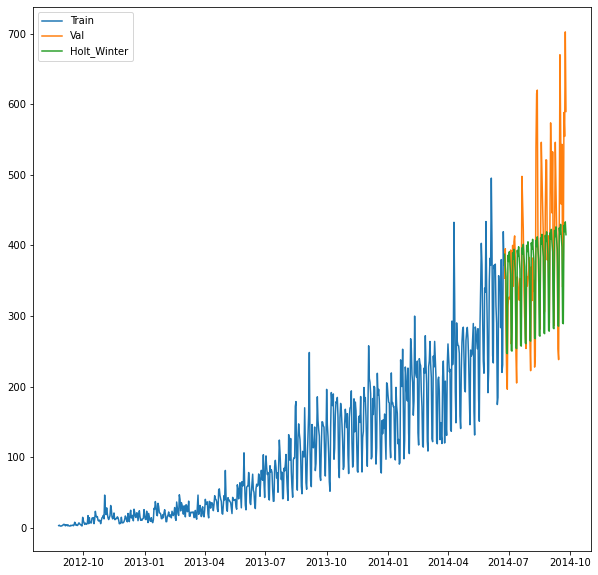

In [175]:
plt.figure(figsize = (10, 10))
plt.plot(Train['Count'], label = 'Train')
plt.plot(val['Count'], label = 'Val')
plt.plot(y_hat_avg['Holt_Winter'], label = 'Holt_Winter')
plt.legend(loc = 'best')
plt.show()

In [176]:
print(f"RMSE for Holt's Winter Trend: {RMSE(np.asarray(val.Count), np.asarray(y_hat_avg.Holt_Winter))}")

RMSE for Holt's Winter Trend: 82.17103714967703


In [177]:
# Predicting for test.

test['prediction'] = fit1.forecast(len(test))

In [179]:
merge = pd.merge(test, test_orignal, on = ('day', 'month', 'year'), how = 'left')
merge.head()

,ID_x,year,month,day,Hour_x,prediction,ID_y,Datetime,Hour_y
0,18299.5,2014.0,9.0,26.0,11.5,387.416123,18288,2014-09-26 00:00:00,0
1,18299.5,2014.0,9.0,26.0,11.5,387.416123,18289,2014-09-26 01:00:00,1
2,18299.5,2014.0,9.0,26.0,11.5,387.416123,18290,2014-09-26 02:00:00,2
3,18299.5,2014.0,9.0,26.0,11.5,387.416123,18291,2014-09-26 03:00:00,3
4,18299.5,2014.0,9.0,26.0,11.5,387.416123,18292,2014-09-26 04:00:00,4


In [180]:
merge['Hour'] = merge['Hour_y']

In [181]:
merge = merge.drop(['year', 'month', 'Datetime', 'Hour_x', 'Hour_y'], axis = 1)

In [182]:
merge.head()

,ID_x,day,prediction,ID_y,Hour
0,18299.5,26.0,387.416123,18288,0
1,18299.5,26.0,387.416123,18289,1
2,18299.5,26.0,387.416123,18290,2
3,18299.5,26.0,387.416123,18291,3
4,18299.5,26.0,387.416123,18292,4


In [183]:
# Predicting by merging merge and temp2

prediction = pd.merge(merge, temp2, on = ['Hour'], how= 'left')
prediction.head()

,ID_x,day,prediction,ID_y,Hour,ratio
0,18299.5,26.0,387.416123,18288,0,0.044287
1,18299.5,26.0,387.416123,18289,1,0.035343
2,18299.5,26.0,387.416123,18290,2,0.029911
3,18299.5,26.0,387.416123,18291,3,0.024714
4,18299.5,26.0,387.416123,18292,4,0.020802


In [184]:
prediction['Count'] = prediction['prediction']*prediction['ratio']*24
prediction['ID'] = prediction['ID_y']
prediction.head()

,ID_x,day,prediction,ID_y,Hour,ratio,Count,ID
0,18299.5,26.0,387.416123,18288,0,0.044287,411.776116,18288
1,18299.5,26.0,387.416123,18289,1,0.035343,328.618883,18289
2,18299.5,26.0,387.416123,18290,2,0.029911,278.112792,18290
3,18299.5,26.0,387.416123,18291,3,0.024714,229.794665,18291
4,18299.5,26.0,387.416123,18292,4,0.020802,193.418864,18292


In [185]:
submission = prediction.drop(['ID_x', 'ID_y', 'day', 'Hour', 'ratio'], axis = 1)

In [186]:
# Exporting the predictions

pd.DataFrame(submission, columns = ['ID', 'Count']).to_csv(fr'C:\Dropbox\GenAI\Analytics_Vidhya\Time_Series_Forecasting_using_Python/Holt_Winter.csv', index = False)